# 방향을 알아낼 수 있게
본 노트북은 CIR의 특성을 이용해, 각 신호의 반사파가 생긴 곳의 방향을 구별해내는 것을 목표로한다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_EDA import get_data, same_peak, get_raw_data
from method import *

In [2]:
# get_data("지정하고 싶은 이름, "파일 이름")
get_raw_data("raw_data/R_anchor_2m_0m.csv", "20240819-203038_DecaWaveAllAccum_R_anchor_2m_0m.log")
get_raw_data("raw_data/R_anchor_2m_1_5m.csv", "20240819-210400_DecaWaveAllAccum_R_anchor_2m_1_5m.log")
get_raw_data("raw_data/R_tag_2m_0m.csv", "20240819-204659_DecaWaveAllAccum_R_tag_2m_0m.log")
get_raw_data("raw_data/R_tag_2m_1_5m.csv", "20240819-205521_DecaWaveAllAccum_R_tag_2m_1_5m.log")
get_raw_data("raw_data/L_anchor_2m_0m.csv", "20240819-211414_DecaWaveAllAccum_L_anchor_2m_0m.log")
get_raw_data("raw_data/L_anchor_2m_1_5m.csv", "20240819-213245_DecaWaveAllAccum_L_anchor_2m_1_5m.log")
get_raw_data("raw_data/L_tag_2m_0m.csv", "20240819-212655_DecaWaveAllAccum_L_tag_2m_0m.log")
get_raw_data("raw_data/L_tag_2m_1_5m.csv", "20240819-213858_DecaWaveAllAccum_L_tag_2m_1_5m.log")
get_raw_data("raw_data/ground_truth.csv", "20240819-214752_DecaWaveAllAccum_empty.log")

len(data_log):  583
not 1016:  3
after:  0
583
len(data_log):  803
not 1016:  9
after:  0
803
len(data_log):  634
not 1016:  3
after:  0
634
len(data_log):  783
not 1016:  3
after:  0
783
len(data_log):  799
not 1016:  6
after:  0
799
len(data_log):  686
not 1016:  12
after:  0
686
len(data_log):  630
not 1016:  10
after:  0
630
len(data_log):  648
not 1016:  3
after:  0
648
len(data_log):  709
not 1016:  10
after:  0
709


In [4]:
# data 불러오기
ra20 = pd.read_csv("raw_data/R_anchor_2m_0m.csv", index_col=0)
ra215 = pd.read_csv("raw_data/R_anchor_2m_1_5m.csv", index_col=0)
rt20 = pd.read_csv("raw_data/R_tag_2m_0m.csv", index_col=0)
rt215 = pd.read_csv("raw_data/R_tag_2m_1_5m.csv", index_col=0)
la20 = pd.read_csv("raw_data/L_anchor_2m_0m.csv", index_col=0)
la215 = pd.read_csv("raw_data/L_anchor_2m_1_5m.csv", index_col=0)
lt20 = pd.read_csv("raw_data/L_tag_2m_0m.csv", index_col=0)
lt215 = pd.read_csv("raw_data/L_tag_2m_1_5m.csv", index_col=0)
empty = pd.read_csv("raw_data/ground_truth.csv", index_col=0)

In [5]:
# 앞뒤의 20개 데이터 제거
ra20 = ra20[20:-20]
ra215 = ra215[20:-20]
rt20 = rt20[20:-20]
rt215 = rt215[20:-20]
la20 = la20[20:-20]
la215 = la215[20:-20]
lt20 = lt20[20:-20]
lt215 = lt215[20:-20]
empty = empty[20:-20]

In [20]:
same_empty = same_peak(empty)
same_ra20 = same_peak(ra20)
same_ra215 = same_peak(ra215)
same_rt20 = same_peak(rt20)
same_rt215 = same_peak(rt215)
same_la20 = same_peak(la20)
same_la215 = same_peak(la215)
same_lt20 = same_peak(lt20)
same_lt215 = same_peak(lt215)

<Axes: >

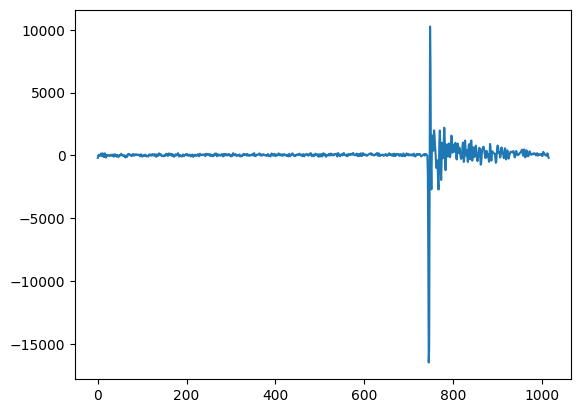

In [7]:
empty.iloc[10].plot()

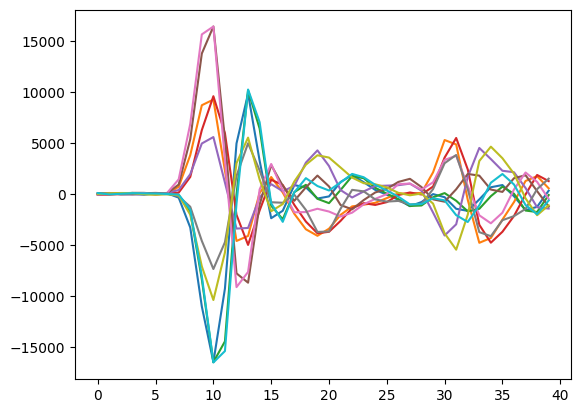

In [8]:
for i in range(0, 10):
    same_empty.iloc[i][:40].plot()

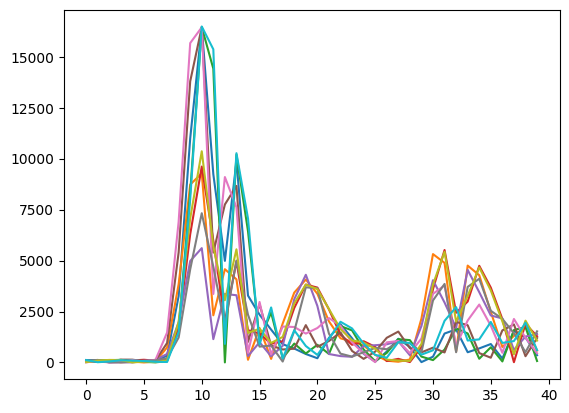

In [9]:
for i in range(0, 10):
    abs(same_empty.iloc[i][:40]).plot()

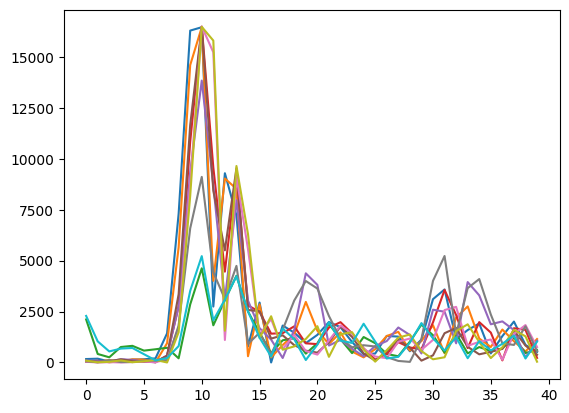

In [23]:
for i in range(0, 10):
    abs(same_ra20.iloc[i][:40]).plot()

In [13]:
for i in range(10):
    print("total_energy: ", calculate_total_energy(same_empty.iloc[i][:40]))
    print("max_amplitude: ", calculate_max_amplitude(same_empty.iloc[i][:40]))
    print("normal_strongest_path_energy: ", calculate_normalized_strongest_path_energy(same_empty.iloc[i][:40]))
    # print("signal-to-noise_ratio: ", calculate_signal_to_noise_ratio(same_empty.iloc[i][:40]))
    # print("rise time: ", calculate_rise_time(same_empty.iloc[i][:40]))
    print("kurtosis: ", calculate_kurtosis(same_empty.iloc[i][:40]))
    # print("mean excess delay: ", calculate_mean_excess(same_empty.iloc[i][:40]))
    # print("root-mean-square delay spread: ", calculate_root_mean_square(same_empty.iloc[i][:40]))

total_energy:  649167173
max_amplitude:  16448
normal_strongest_path_energy:  0.4167442767473395
kurtosis:  6.278778588990193
total_energy:  384324694
max_amplitude:  9285
normal_strongest_path_energy:  0.22431872410467593
kurtosis:  1.5040982250123074
total_energy:  726079643
max_amplitude:  16455
normal_strongest_path_energy:  0.3729164253679538
kurtosis:  6.388898647365407
total_energy:  356964998
max_amplitude:  9613
normal_strongest_path_energy:  0.2588762750346744
kurtosis:  1.4740854367813654
total_energy:  202832280
max_amplitude:  5611
normal_strongest_path_energy:  0.15521849382159486
kurtosis:  0.2030096712592484
total_energy:  694322440
max_amplitude:  16449
normal_strongest_path_energy:  0.38968868844279325
kurtosis:  6.254805760857872
total_energy:  799472052
max_amplitude:  16446
normal_strongest_path_energy:  0.33831190886957985
kurtosis:  5.416682887274803
total_energy:  238799984
max_amplitude:  7325
normal_strongest_path_energy:  0.22468856195568254
kurtosis:  0.8436

In [28]:
np.mean(calculate_total_energy(same_ra20.iloc[0:500][:40]))

/home/juhwan/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


139545415.43125

In [32]:
print(np.mean(calculate_total_energy(same_empty.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_ra20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_ra215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_rt20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_rt215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_la20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_la215.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_lt20.iloc[0:500][:20]), axis=0))
print(np.mean(calculate_total_energy(same_lt215.iloc[0:500][:20]), axis=0))

71198218.33125
70096661.55
69066366.38125
75148316.2125
77346712.425
73500560.43125
56780108.6625
86571207.3375
77798486.75625
